Importing sucrose model

In [1]:
%run model_sucrose.ipynb

In [2]:
import numpy as np

In [3]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
fseof = FSEOF(model)
result = fseof.run(target = model.reactions.DM_surfactin_c)
df = result.data_frame

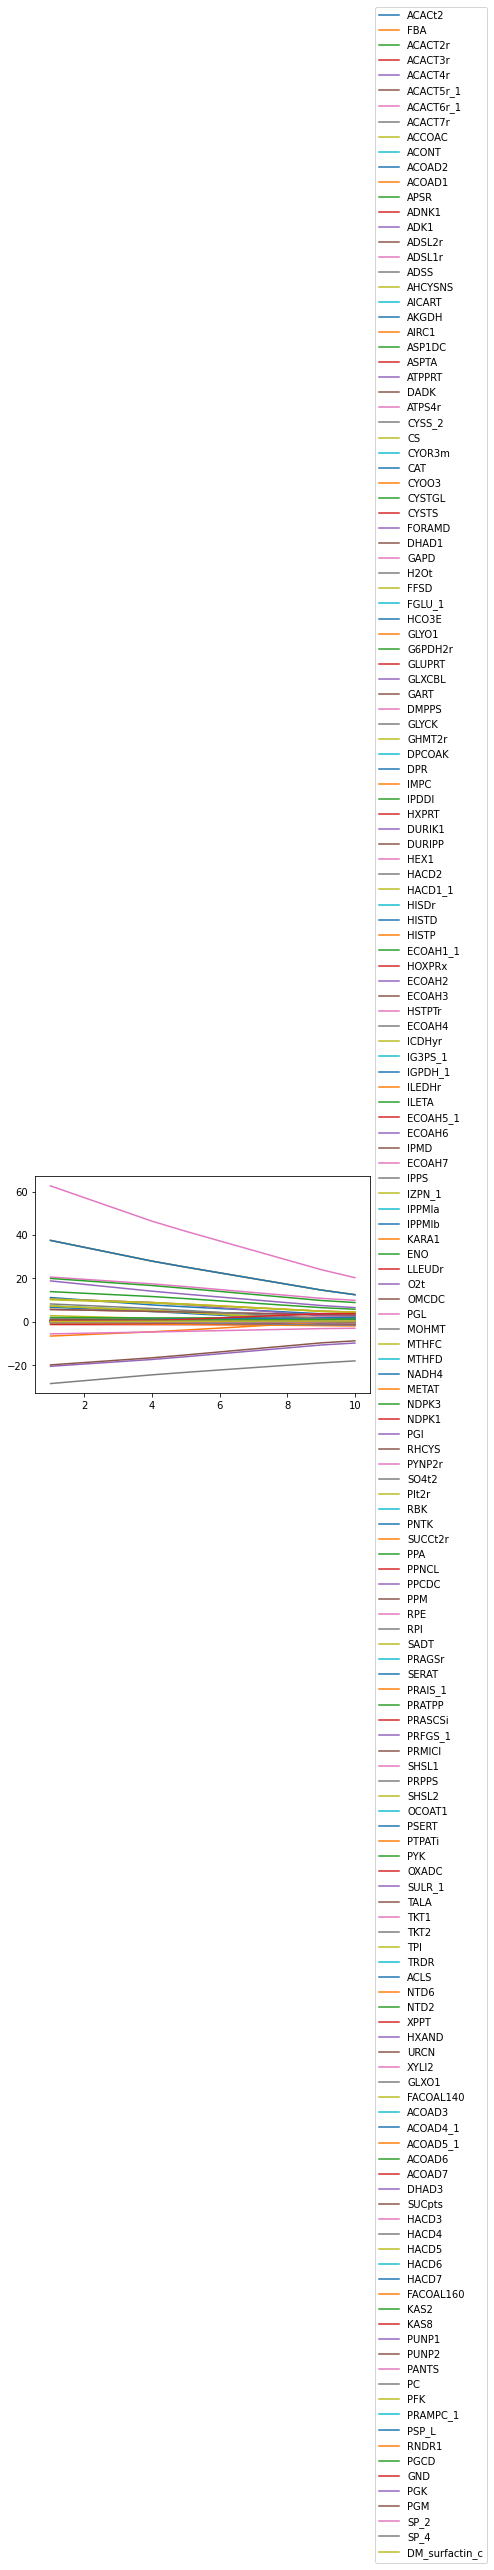

In [4]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [5]:
# sorting 
df= df.sort_values([1], ascending = False)
 
# removing genes from dataframe 
removed_zero = (df[1] != 0)
df = df.loc[removed_zero]

df.head()

,1,2,3,4,5,6,7,8,9,10
ATPS4r,62.612368,57.187515,51.762662,46.337809,41.668253,37.249920,32.831587,28.413253,23.994920,20.282517
NADH4,37.472065,34.290564,31.109064,27.927563,25.153216,22.513634,19.874052,17.234470,14.594888,12.443825
CYOO3,37.472065,34.290564,31.109064,27.927563,25.153216,22.513634,19.874052,17.234470,14.594888,12.443825
CYOR3m,37.472065,34.290564,31.109064,27.927563,25.153216,22.513634,19.874052,17.234470,14.594888,12.443825
GAPD,20.583523,19.533698,18.483873,17.434048,16.163779,14.812191,13.460603,12.109016,10.757428,9.854504


In [6]:
#def bar_color(df,color1,color2):
#    return np.where(df.values >=0,color1,color2).T

#fig = df.plot(legend=None, kind='bar', color=bar_color(df,'g','r'),figsize=(20, 4), grid =False);
#fig.set_ylabel('Change in flux')
#fig.set_xlabel('Gene names')
#fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

In [7]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[1] 

In [8]:
target_reactions_df = df[df['relative_change_in_flux'] > 1]

In [9]:
df = df.drop('DM_surfactin_c')

In [10]:
df= df.sort_values(['relative_change_in_flux'], ascending = False)

In [11]:
df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
GLYO1,0.029897,0.062262,0.094627,0.126992,0.159357,0.191722,0.224087,0.256452,0.288817,0.520449,16.408068
GART,0.030105,0.062450,0.094794,0.127139,0.159483,0.191827,0.224172,0.256516,0.288860,0.332798,10.054576
RPE,0.194107,0.174909,0.155712,0.136514,0.457035,0.897201,1.337368,1.777534,2.217701,2.108236,9.861205
PANTS,0.032143,0.064286,0.096429,0.128571,0.160714,0.192857,0.225000,0.257143,0.289286,0.321429,8.999969
PPNCL,0.032143,0.064286,0.096429,0.128571,0.160714,0.192857,0.225000,0.257143,0.289286,0.321429,8.999969
...,...,...,...,...,...,...,...,...,...,...,...
ACACT4r,-0.266172,-0.184406,-0.102640,-0.020875,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-1.000000
HACD6,-0.266172,-0.184406,-0.102640,-0.020875,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-1.000000
HACD5,-0.266172,-0.184406,-0.102640,-0.020875,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-1.000000
ACOAD1,-0.266172,-0.184406,-0.102640,-0.020875,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-1.000000


In [12]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)

Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

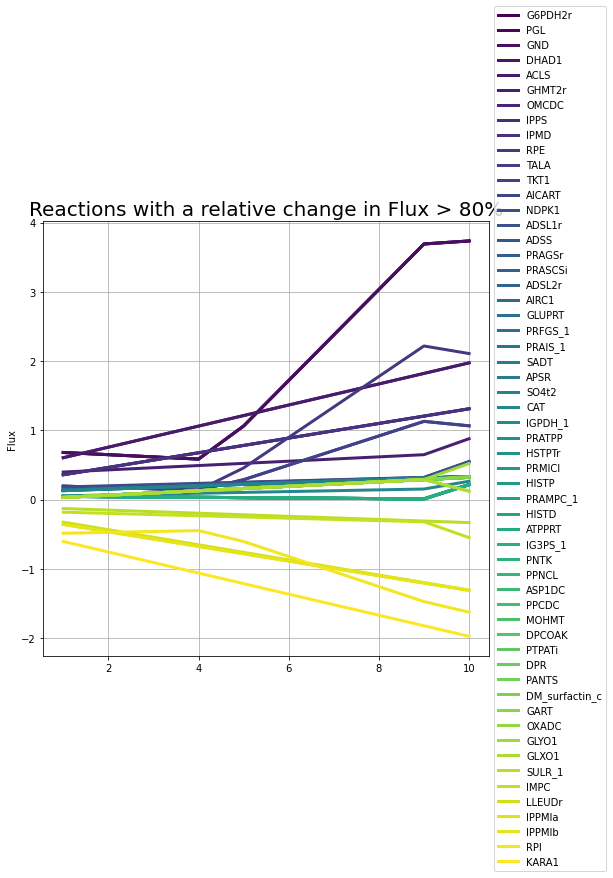

In [13]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

In [14]:
#lowest flux reactions
target_reactions_df.tail()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
LLEUDr,-0.325355,-0.434464,-0.543574,-0.652683,-0.761793,-0.870902,-0.980011,-1.089121,-1.198230,-1.307339,3.018192
IPPMIa,-0.358359,-0.464204,-0.570049,-0.675894,-0.781740,-0.887585,-0.993430,-1.099276,-1.205121,-1.310966,2.658248
IPPMIb,-0.358359,-0.464204,-0.570049,-0.675894,-0.781740,-0.887585,-0.993430,-1.099276,-1.205121,-1.310966,2.658248
RPI,-0.486121,-0.473365,-0.460609,-0.447853,-0.604956,-0.821881,-1.038807,-1.255733,-1.472659,-1.625630,2.344085
KARA1,-0.604206,-0.756380,-0.908555,-1.060729,-1.212903,-1.365078,-1.517252,-1.669426,-1.821601,-1.973775,2.266725


In [15]:
#higest flux reactions
target_reactions_df.head()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
G6PDH2r,0.680228,0.648274,0.616321,0.584367,1.061991,1.719083,2.376175,3.033267,3.690359,3.733866,4.489139
PGL,0.680228,0.648274,0.616321,0.584367,1.061991,1.719083,2.376175,3.033267,3.690359,3.733866,4.489139
GND,0.680228,0.648274,0.616321,0.584367,1.061991,1.719083,2.376175,3.033267,3.690359,3.733866,4.489139
DHAD1,0.604206,0.756380,0.908555,1.060729,1.212903,1.365078,1.517252,1.669426,1.821601,1.973775,2.266725
ACLS,0.604206,0.756380,0.908555,1.060729,1.212903,1.365078,1.517252,1.669426,1.821601,1.973775,2.266725


In [16]:
#increase flux of possible upregulation target to at least the flux found in FSEOF
with model:
    print(model.slim_optimize())
    print(model.reactions.GLYO1.flux)
    print(model.reactions.DM_surfactin_c.flux)
    model.reactions.GLYO1.lower_bound = 0.520449
    print(model.slim_optimize()) 
    print(model.reactions.GLYO1.flux)
    print(model.reactions.DM_surfactin_c.flux)

0.6241848146320509
1.8919343064769113e-15
9.521799953938769e-16
0.6241848146320497
0.520449
1.0551079239096957e-15


In [17]:
with model:
    print(model.slim_optimize())
    print(model.reactions.GART.flux)
    print(model.reactions.DM_surfactin_c.flux)
    model.reactions.GART.lower_bound = 0.332798
    print(model.slim_optimize()) 
    print(model.reactions.GART.flux)
    print(model.reactions.DM_surfactin_c.flux)

0.6241848146320509
0.0
9.521799953938777e-16
0.62418481463205
0.332798
9.884426130658677e-16


In [18]:
with model:
    print(model.slim_optimize())
    print(model.reactions.RPE.flux)
    print(model.reactions.DM_surfactin_c.flux)
    model.reactions.RPE.lower_bound = 2.108236
    print(model.slim_optimize()) 
    print(model.reactions.RPE.flux)
    print(model.reactions.DM_surfactin_c.flux)

0.6241848146320519
7.581537455154479
1.7524236419277831e-16
0.6241848146320519
7.5815374551544785
1.7524236419277831e-16


In [19]:
with model:
    print(model.slim_optimize())
    print(model.reactions.PNTK.flux)
    print(model.reactions.DM_surfactin_c.flux)
    model.reactions.PNTK.lower_bound = 0.321429
    print(model.slim_optimize()) 
    print(model.reactions.PNTK.flux)
    print(model.reactions.DM_surfactin_c.flux)

0.6241848146320519
1.3877787807814457e-16
1.7524236419277831e-16
0.06241773244142974
0.321429
0.3214289999999999


In [20]:
with model:
    print(model.slim_optimize())
    print(model.reactions.DM_surfactin_c.flux)
    model.reactions.GLYO1.lower_bound = 0.520449
    model.reactions.GART.lower_bound = 0.332798
    model.reactions.RPE.lower_bound = 2.108236
    model.reactions.PNTK.lower_bound = 0.321429
    print(model.slim_optimize()) 
    print(model.reactions.DM_surfactin_c.flux)

0.6241848146320916
1.3877787807814457e-16
0.06241773244143396
0.32142900000000013
